# Part I - Ford GoBike Data Exploration
## by Simba Pfaira

# Introduction
This project explores the `San Francisco Bay Area Bike Share` dataset which contains information about trips taken by riders, their subscription type, their age, their gender, stations of starting and ending trips, duration of trips among other attributes.

The San Francisco Bay Area Bike Share is a public bicycle sharing system around the San Francisco Bay Area. Bicycles are made available for shared use to individuals on a short term basis for a once-off price or for a mothly or annual subscription fees. The system allows people to borrow a bike from a `dock` and return it at another dock belonging to the same system. Docks are special bike racks that lock the bike, and only release it by computer control. The user enters payment information, and the computer unlocks a bike. The user returns the bike by placing it in the dock, which locks it in place. The system uses smartphone mapping apps which show nearby available bikes and open docks.


# Preliminary Wrangling


In [2]:
# Importing all required packages and setting plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# Loading the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Printing out the dataframe statistics and attributes
print(df.shape)
print(df.info())
df.head().T

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,0,1,2,3,4
duration_sec,52185,42521,61854,36490,1585
start_time,2019-02-28 17:32:10.1450,2019-02-28 18:53:21.7890,2019-02-28 12:13:13.2180,2019-02-28 17:54:26.0100,2019-02-28 23:54:18.5490
end_time,2019-03-01 08:01:55.9750,2019-03-01 06:42:03.0560,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740
start_station_id,21.0,23.0,86.0,375.0,7.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),The Embarcadero at Steuart St,Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza
start_station_latitude,37.789625,37.791464,37.769305,37.774836,37.804562
start_station_longitude,-122.400811,-122.391034,-122.426826,-122.446546,-122.271738
end_station_id,13.0,81.0,3.0,70.0,222.0
end_station_name,Commercial St at Montgomery St,Berry St at 4th St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St
end_station_latitude,37.794231,37.77588,37.786375,37.773311,37.792714


### The structure of your dataset

The dataset contains information on 183412 bike trips and has 16 attributes for each bike trip.

### The main feature of interest in your dataset

I am most interested in figuring out the relationship between the duration of the rides, the gender and the age group of the users, and also how do bike trip patterns vary by time of day and the day of the week?

### Features in the dataset that will help support the investigation into the features of interest

I expect that days of the week will be the main feature influencing the demand of trips.

# Data cleaning

Before I begin any data analysis and visualizations I would start by exploring and cleaning the dataset.

In [57]:
# Getting the description of the dataframe
df.describe()

,duration_min,member_age,start_hour,end_hour
count,174952.000000,174952.000000,174952.000000,174952.000000
mean,11.733224,34.125086,13.456165,13.609533
std,27.372059,9.872319,4.734282,4.748029
min,1.000000,18.000000,0.000000,0.000000
25%,5.000000,27.000000,9.000000,9.000000
50%,8.000000,32.000000,14.000000,14.000000
75%,13.000000,39.000000,17.000000,18.000000
max,1409.000000,80.000000,23.000000,23.000000


In [5]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [56]:
# Checking for rows with null values
df.isnull().sum()

start_station_name         0
end_station_name           0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
member_age                 0
start_day                  0
start_hour                 0
end_hour                   0
dtype: int64

###### From the above exploration I can see that there are at most 8265 rows with at least one attribute missing. Since the rows with missing data only accounts for 4% (8265/183412) of the whole dataset, I will just drop the rows.

In [7]:
# DEFINE
# Dropping the all rows in the dataset that contains any null value.

# CODE
df.dropna(axis=0,inplace=True)

# TEST
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

##### Next I will create a `duration_min` column from the `duration_sec` column since minutes are the most commonly used unit of measurement for time than seconds. 

In [8]:
# DEFINE
# Creating a minute column from the seconds column

# CODE
df['duration_min'] = round(df['duration_sec']/60)
df['duration_min'] = df['duration_min'].astype(int)

# TEST
df.head().T

,0,2,3,4,5
duration_sec,52185,61854,36490,1585,1793
start_time,2019-02-28 17:32:10.1450,2019-02-28 12:13:13.2180,2019-02-28 17:54:26.0100,2019-02-28 23:54:18.5490,2019-02-28 23:49:58.6320
end_time,2019-03-01 08:01:55.9750,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740,2019-03-01 00:19:51.7600
start_station_id,21.0,86.0,375.0,7.0,93.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza,4th St at Mission Bay Blvd S
start_station_latitude,37.789625,37.769305,37.774836,37.804562,37.770407
start_station_longitude,-122.400811,-122.426826,-122.446546,-122.271738,-122.391198
end_station_id,13.0,3.0,70.0,222.0,323.0
end_station_name,Commercial St at Montgomery St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St,Broadway at Kearny
end_station_latitude,37.794231,37.786375,37.773311,37.792714,37.798014


##### Next I will add a `member_age` column from the `member_birth_year` column. This will be 2019 minus the birth year, since the dataset is for the year 2019.

In [9]:
# DEFINE
# Creating age from birth year

# CODE
df['member_age'] = 2019 - df['member_birth_year']
df['member_age'] = df['member_age'].astype(int)

# TEST
df.head().T

,0,2,3,4,5
duration_sec,52185,61854,36490,1585,1793
start_time,2019-02-28 17:32:10.1450,2019-02-28 12:13:13.2180,2019-02-28 17:54:26.0100,2019-02-28 23:54:18.5490,2019-02-28 23:49:58.6320
end_time,2019-03-01 08:01:55.9750,2019-03-01 05:24:08.1460,2019-03-01 04:02:36.8420,2019-03-01 00:20:44.0740,2019-03-01 00:19:51.7600
start_station_id,21.0,86.0,375.0,7.0,93.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza,4th St at Mission Bay Blvd S
start_station_latitude,37.789625,37.769305,37.774836,37.804562,37.770407
start_station_longitude,-122.400811,-122.426826,-122.446546,-122.271738,-122.391198
end_station_id,13.0,3.0,70.0,222.0,323.0
end_station_name,Commercial St at Montgomery St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St,Broadway at Kearny
end_station_latitude,37.794231,37.786375,37.773311,37.792714,37.798014


##### Next I will convert `start_time` and `end_time` to a datetime object

In [10]:
# DEFINE
# Converting `start_time` and `end_time` to a datetime object

# CODE
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

##### Next I will create a `start_day` column from the `start_time` column, which denotes the day when bikes are booked and the trip started. I will not extract the `end_day` since all of the trips ends in the same day as can be seen from the `df.describe` function. (max: 23hrs - 84548sec/60/60).

In [11]:
# DEFINE
# Extract the day of the week from start_time and adding the `start_day` column

# CODE
df['start_day'] = pd.Series(df['start_time'].dt.day_name())

# Test
df.head().T

,0,2,3,4,5
duration_sec,52185,61854,36490,1585,1793
start_time,2019-02-28 17:32:10.145000,2019-02-28 12:13:13.218000,2019-02-28 17:54:26.010000,2019-02-28 23:54:18.549000,2019-02-28 23:49:58.632000
end_time,2019-03-01 08:01:55.975000,2019-03-01 05:24:08.146000,2019-03-01 04:02:36.842000,2019-03-01 00:20:44.074000,2019-03-01 00:19:51.760000
start_station_id,21.0,86.0,375.0,7.0,93.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza,4th St at Mission Bay Blvd S
start_station_latitude,37.789625,37.769305,37.774836,37.804562,37.770407
start_station_longitude,-122.400811,-122.426826,-122.446546,-122.271738,-122.391198
end_station_id,13.0,3.0,70.0,222.0,323.0
end_station_name,Commercial St at Montgomery St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St,Broadway at Kearny
end_station_latitude,37.794231,37.786375,37.773311,37.792714,37.798014


##### Next, I will extract `start_hour` and `end_hour` from the `start_time` and `end_time` respectively.

In [12]:
# DEFINE
# Extracting start and end hours

# CODE
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

# TEST
df.head().T

,0,2,3,4,5
duration_sec,52185,61854,36490,1585,1793
start_time,2019-02-28 17:32:10.145000,2019-02-28 12:13:13.218000,2019-02-28 17:54:26.010000,2019-02-28 23:54:18.549000,2019-02-28 23:49:58.632000
end_time,2019-03-01 08:01:55.975000,2019-03-01 05:24:08.146000,2019-03-01 04:02:36.842000,2019-03-01 00:20:44.074000,2019-03-01 00:19:51.760000
start_station_id,21.0,86.0,375.0,7.0,93.0
start_station_name,Montgomery St BART Station (Market St at 2nd St),Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza,4th St at Mission Bay Blvd S
start_station_latitude,37.789625,37.769305,37.774836,37.804562,37.770407
start_station_longitude,-122.400811,-122.426826,-122.446546,-122.271738,-122.391198
end_station_id,13.0,3.0,70.0,222.0,323.0
end_station_name,Commercial St at Montgomery St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St,Broadway at Kearny
end_station_latitude,37.794231,37.786375,37.773311,37.792714,37.798014


In [54]:
df['member_age'].describe()

count    174952.000000
mean         34.125086
std           9.872319
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

##### We can see that there are some invalid data in the `member_age` column as we can see that the highest age is 141 years. This might be due to errors at during subscriber registrations. So I will replace all the riders with over 80 years with the mean age.

In [14]:
# DEFINE
# Imputing  80+ years rides with the mean age.

# CODE
df['member_age'].values[df['member_age'] > 80] = df['member_age'].mean()

# TEST
print((df['member_age'] > 80).sum())
df.describe()

0


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_min,member_age,start_hour,end_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,11.733224,34.125086,13.456165,13.609533
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,27.372059,9.872319,4.734282,4.748029
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,1.000000,18.000000,0.000000,0.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,5.000000,27.000000,9.000000,9.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,8.000000,32.000000,14.000000,14.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,13.000000,39.000000,17.000000,18.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,1409.000000,80.000000,23.000000,23.000000


##### Finally, I will drop the columns that I do not intend to use in my project.

In [15]:
# DEFINE
# Dropping unwanted columns

# CODE
df.drop(['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year'], inplace = True, axis=1)

# TEST
df.head().T

,0,2,3,4,5
start_station_name,Montgomery St BART Station (Market St at 2nd St),Market St at Dolores St,Grove St at Masonic Ave,Frank H Ogawa Plaza,4th St at Mission Bay Blvd S
end_station_name,Commercial St at Montgomery St,Powell St BART Station (Market St at 4th St),Central Ave at Fell St,10th Ave at E 15th St,Broadway at Kearny
user_type,Customer,Customer,Subscriber,Subscriber,Subscriber
member_gender,Male,Male,Other,Male,Male
bike_share_for_all_trip,No,No,No,Yes,No
duration_min,870,1031,608,26,30
member_age,35,47,30,45,60
start_day,Thursday,Thursday,Thursday,Thursday,Thursday
start_hour,17,12,17,23,23
end_hour,8,5,4,0,0


# 1. Univariate Exploration

### Function to reduce repetitive code
Before I can start with my my visualizations i will have to create a fuction to reduce repetitive code for plotting visuals

In [16]:
# Creating the function for plotting charts
def plotVisual(x_label, y_label, chart_title) :
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.figure(figsize = (12,8))
    plt.show()

### Question
#### What is the gender proportions of the people who used the bike sharing system?

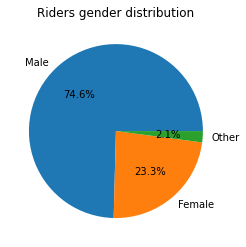

In [55]:
# VISUALIZATION
plt.pie(df['member_gender'].value_counts(), labels = ['Male','Female','Other'], autopct = '%1.1f%%');
plt.title('Riders gender distribution');

### Observation
From the above visualizations it is clear that most of the users were men with 23% of them being females and very little amount of them with undisclosed genders. 

### Question
#### Which type of users partook most in the trips?

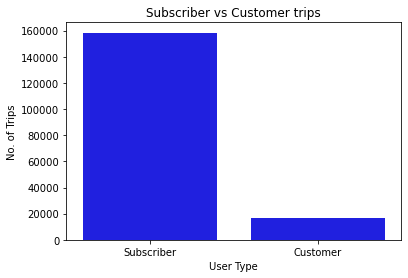

<Figure size 864x576 with 0 Axes>

In [18]:
# VISUALIZATION
sb.countplot(data = df, x = 'user_type', order = df['user_type'].value_counts().index, color = 'b');
plotVisual('User Type', 'No. of Trips', 'Subscriber vs Customer trips');

### Observation
From the visualization we can observe that most of the trips were taken by subscribers which are close to 16000 and those of customers are only close to 2000.

### Question
#### What is the age distribution of the users?

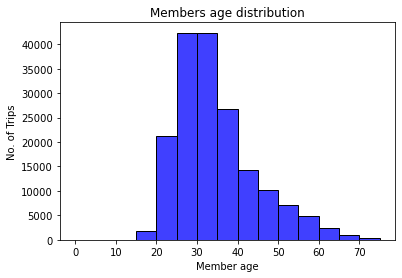

<Figure size 864x576 with 0 Axes>

In [19]:
# VISUALIZATION
bins = np.arange(0, df['member_age'].max(), 5)
sb.histplot(df['member_age'], bins = bins, color = 'b');
plotVisual('Member age', 'No. of Trips', 'Members age distribution')

### Observation
From the histogram, we can see that the highest number of the people who used the bike sharing system are between 25 and 35 years.

### Question
#### What is the distribution of trips over the days of the week?

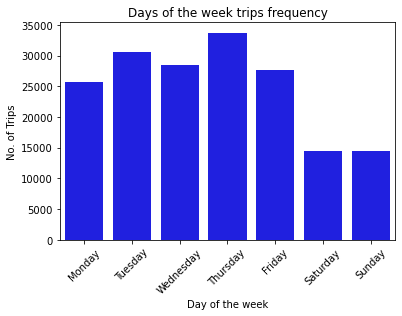

<Figure size 864x576 with 0 Axes>

In [20]:
# VISUALIZATION
order_of_days =  ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot( data = df, x = 'start_day', color='b', order = order_of_days)
plt.xticks(rotation = 45)
plotVisual('Day of the week', 'No. of Trips', 'Days of the week trips frequency')

### Observation
From the visualization we can see that most of the trips occurred during the weekdays than the weekends. This is expected as weekdays has more activity than weekends, people going to school, work e.t.c

### Question
#### What is the distribution of the trips' duration?

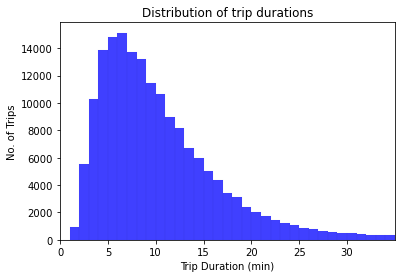

<Figure size 864x576 with 0 Axes>

In [21]:
# VISUALIZATION
ticks = list(range(35)) # Limiting the duration to 35 mins to remove outliers
bins = np.arange(0, df['duration_min'].max()+5)
sb.histplot(df['duration_min'], bins = bins, color = 'b', kde=False);
plt.xlim((0, 35));
plt.xticks(ticks[::5])
plotVisual('Trip Duration (min)', 'No. of Trips', 'Distribution of trip durations')

### Observation
Most trips were between 4 and 9 minutes long.

### Question
#### How are the trips distributed throughout the hours of the day?

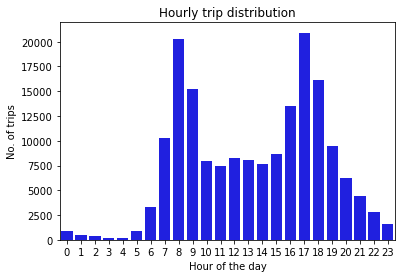

<Figure size 864x576 with 0 Axes>

In [22]:
# VISUALIZATION
sb.countplot( data = df , x = 'start_hour', color = 'b' )
plotVisual('Hour of the day', 'No. of trips', 'Hourly trip distribution')

### Observation
The hourly distribution is bimodal, the rush hours of 8am and 5pm having the highest number of trips, which is as I expected since highest movements occurs when people are going to and from work.

### Question
#### When do trips end during the hours of the day?

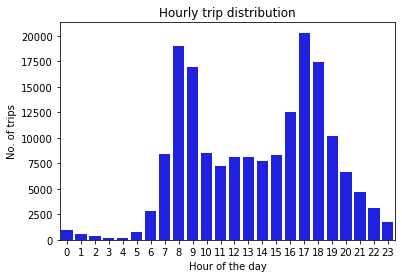

<Figure size 864x576 with 0 Axes>

In [23]:
# VISUALIZATION
sb.countplot( data = df , x = 'end_hour', color = 'b' )
plotVisual('Hour of the day', 'No. of trips', 'Hourly trip distribution')

### Observation
The hourly distribution for trip endings is similar to the start hour since more than 95% of trips take less than an hour.

### Question
#### How are the trips distributed throughout the hours of the weekdays?

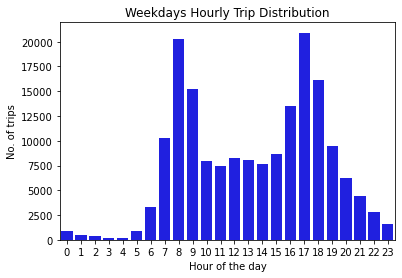

<Figure size 864x576 with 0 Axes>

In [24]:
# VISUALIZATION
sb.countplot(data=df.query('start_day != "Saturday" or start_day != "Sunday"'), x='start_hour', color='b');
plotVisual('Hour of the day', 'No. of trips', 'Weekdays Hourly Trip Distribution')

### Observation
The hourly distribution for weekdays is similar to that of the whole dataset since most of the trips are taken during the weekdays.

### Question
#### How are the trips distributed throughout the hours of the weekend?

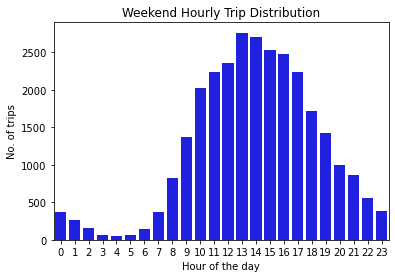

<Figure size 864x576 with 0 Axes>

In [25]:
# VISUALIZATION
sb.countplot(data=df.query('start_day=="Saturday" or start_day=="Sunday"'), x='start_hour', color='b');
plotVisual('Hour of the day', 'No. of trips', 'Weekend Hourly Trip Distribution')

### Observation
The distribution is unimodal with most trips being taken between 1pm and 2pm.

### Question
#### What is the 10 most common destinations for the bike trips?

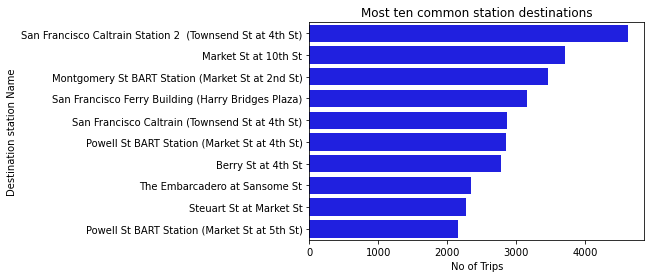

<Figure size 864x576 with 0 Axes>

In [26]:
# VISUALIZATIONS
sb.countplot(data=df, y='end_station_name', color='blue', order=df.end_station_name.value_counts()[:10].index);
plotVisual('No of Trips', 'Destination station Name', 'Most ten common station destinations');

### Observation
The most common destination was San Fransisco Caltrain Station 2.

### The distributions of variables of interest, any unusual points and any transformations
* The dataset contains many male users than female and the undisclosed gender users.
* Moreover, major part of the users are subscribers with very little amount of them falling into the customer category. 
* The duration of the trips are mostly between 4 to 9 minutes, which makes a lot of sense because this riding system is for single, short rides of up to 30 minutes. 
* There did not seem to be any unusual points, therefore there was no need for any transformations. Only outliers were ignored in visualizing som charts.

### Any unusual distributions, operations perfomed on the data to tidy, adjust, or change the form of the data and the reasons.
* The `member_age` attribute had some outliers, which are beyond the normal human lifespan. This data would have distorted the data so I changed all the ages above 80 years to the mean age.
* Moreover, I also dropped some columns I didnt intend to use in this project.

# 2. Bivariate Exploration

## Question
#### Which day of the week has the most average trip duration?

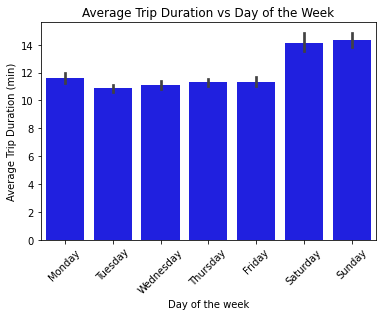

<Figure size 864x576 with 0 Axes>

In [27]:
# VISUALIZATION
order_of_days =  ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(data = df, x = 'start_day', y ='duration_min', color = 'b', order = order_of_days)
plt.xticks(rotation = 45)
plotVisual('Day of the week', 'Average Trip Duration (min)', 'Average Trip Duration vs Day of the Week');

### Observation
The average highest duration of the trips are on Saturday and Sunday. This might suggest that people will be taking trips for fun or exercise during the weekend as they be having free time other than the weekdays.

### Question
#### What is the distribution of trips by user type for each gender type?

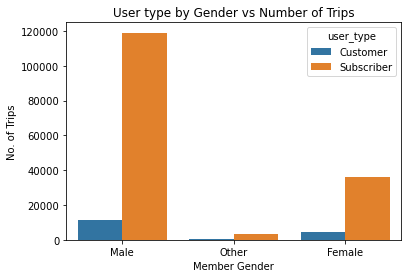

<Figure size 864x576 with 0 Axes>

In [28]:
# VISUALIZATION
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');
plotVisual('Member Gender', 'No. of Trips', 'User type by Gender vs Number of Trips');

### Observation
Irrespective of the gender sub-division subscribers are always greater than the customers.

### Question
#### What is the relationship between trip durations and member age?

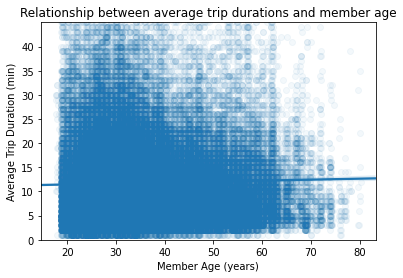

<Figure size 864x576 with 0 Axes>

In [29]:
# VISUALIZATION
ticks = list(range(45)) # limiting the duration to 45 mins to remove outliers
bins = np.arange(0, df['duration_min'].max()+5)
sb.regplot(data = df, x = 'member_age', y = 'duration_min', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.ylim((0, 45));
plt.yticks(ticks[::5])
plotVisual('Member Age (years)', 'Average Trip Duration (min)', 'Relationship between average trip durations and member age')

### Observation
The users between the age of 25 - 35 years took most of the long average trips.

### Question
#### What is the distribution of trip duration per member gender?

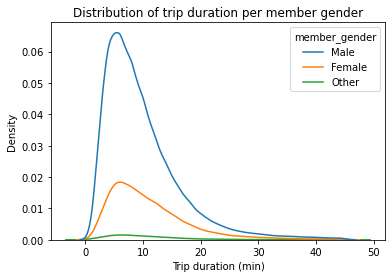

<Figure size 864x576 with 0 Axes>

In [30]:
# VISUALIZATION
sb.kdeplot(x = 'duration_min', data=df[df['duration_min'] <= 45], hue='member_gender')
plotVisual('Trip duration (min)', 'Density', 'Distribution of trip duration per member gender')

### Observation
The distribution does not differ much from that of the whole dataset even if grouped by gender.

### Question
#### What is the average trip duration per each start hour of the day?

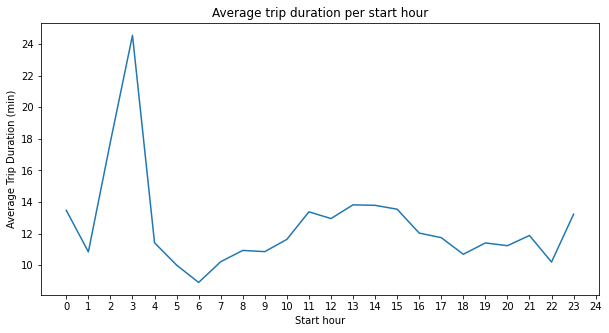

<Figure size 864x576 with 0 Axes>

In [31]:
# VISUALIZATION
df.groupby('start_hour')['duration_min'].mean().plot(kind='line', figsize=(10,5))
plt.xticks([x for x in range(0,25, 1)])
plotVisual('Start hour', 'Average Trip Duration (min)', 'Average trip duration per start hour')

### Observation
Trips which start at 3am are the longest on average.

### Question
#### What is the relationship between user type and trip duration?

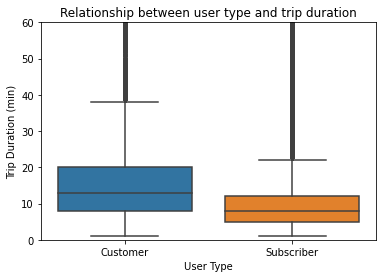

<Figure size 864x576 with 0 Axes>

In [32]:
# VISUALIZATION
sb.boxplot(data = df, x =  df['user_type'], y = df['duration_min'])
plt.ylim((0,60)) # Limiting the ride duration to 60 mins to remove outliers
plotVisual('User Type', 'Trip Duration (min)', 'Relationship between user type and trip duration')

### Observation
From this chart it shows that the average of the trip duration of customers is clearly greater than the average duration of the subscribers.

### The relationships observed and how did the features of interest vary with other features in the dataset.
* The subscribers always have more trips even when grouped by gender.
* The relationship between the trip duration and age is interesting because it shows how the duration decreases with age.
* The relationship between the average trip duration and user type is interesting because it shows that customers take longer rides than the subscribers.

### Interesting relationships between the other features.

* The distributions seem normal and logical.

# 3. Multivariate Exploration

### Question
#### What is average trip for each member gender of the user types?

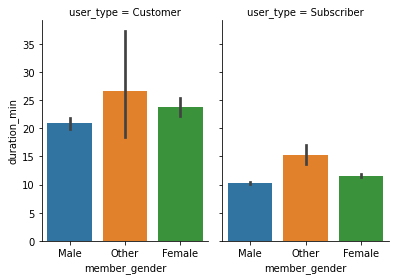

In [33]:
# VISUALIZATION
sb.catplot(x = "member_gender", y = "duration_min",
                col = "user_type",
                data = df, kind = "bar",
                height=4, aspect=.7);

### Observation
Customers have a higher average trip duration across all genders.

### Question 
#### What is the number of trips taken taken by the user types for each day of the week?

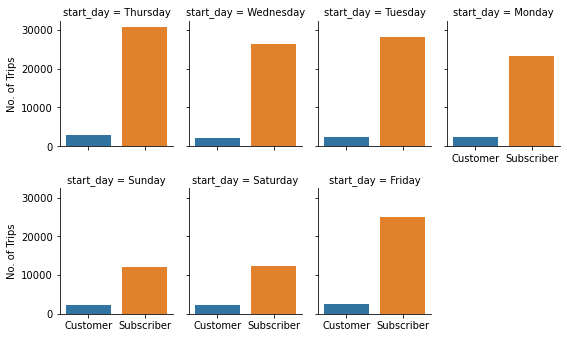

In [34]:
g = sb.catplot(x="user_type", col="start_day", col_wrap=4,
                data=df[df.start_day.notnull()],
                kind="count", height=2.5, aspect=.8)
g.set_axis_labels("", "No. of Trips")

### Observation
The number of trips by customers is within the same range for all the days, but for subscribers number of trips are high during weekdays and on weekend they are low.

### Question
#### What is distribution of trips duration for each gender for each user type?

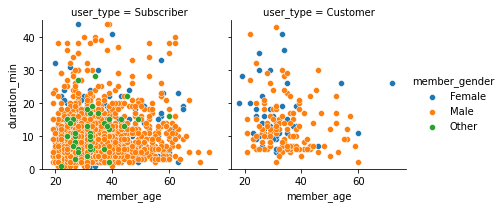

In [51]:
# VISUALIZATION
df2 = df.sample(2000) # To limit overcowding of plots
g = sb.FacetGrid(df2, col="user_type", hue="member_gender")
g.map_dataframe(sb.scatterplot, y= "duration_min", x = "member_age")
g.set(ylim=(0, 45))
g.add_legend()

### Observation
The most trips are between 5-15 minutes and on age of 20-45 years for both customers and subscribers.

### Question
#### What is distribution of trips duration for each gender for each user type?

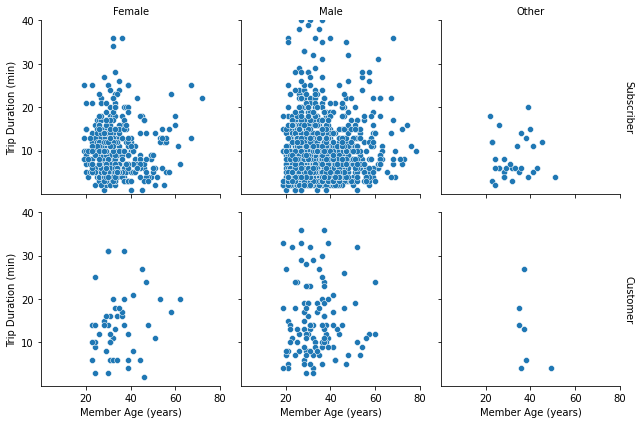

In [52]:
df2 = df.sample(2000)
g = sb.FacetGrid(df2, col="member_gender", row="user_type", margin_titles=True)
g.map_dataframe(sb.scatterplot, x="member_age", y="duration_min")
g.set_axis_labels("Member Age (years)", "Trip Duration (min)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(xlim=(0, 80), ylim=(0, 35), xticks=[20, 40, 60, 80], yticks=[10, 20, 30, 40])
g.tight_layout()

### Observation
The most trips are between 5-15 minutes and on age of 20-45 years for both customers and subscribers.

### The relationships observed. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* Customers have a higher average trip duration across all genders.

* The number of trips by customers is within the same range for all the days, but for subscribers number of trips are high during weekdays and on weekend they are low.

* The most trips are between 5-15 minutes and on age of 20-45 years for both customers and subscribers.

* The most trips are between 5-15 minutes and on age of 20-45 years for both customers and subscribers.

### Were there any interesting or surprising interactions between features?

* There were no suprising interactions between the features.
* The results of the multivariate exploration is similar to that of the previous explorations.

# Conclusions
The main conclusions that can be inferred from this dataset are-:
* bike trips are mostly short, between 5 or 15 minutes long.
* most of the users are between 20 and 40 years of age.
* week days has the most trips with Thursday and Tuesday being the highest.
* most trips start at during the 8th hour in the morning and during the 5th hour in the afternoon, which infers that most users take the trips to go to work.
* the average trip duration during weekends is longer than that during the weekdays.
* customers use the bikes for longer periods than subscribers and the trips usually takes place on weekend.
* San Francisco Caltrain Station 2 and Market St are the two most common destinations.

### Saving cleaned dataset

In [60]:
df.to_csv('201902-fordgobike-tripdata-clean.csv', index=False)